In [1]:
import sys
sys.path.append('../')

import cqt.model.asset_model as md
import cqt.model.asset_model_component_spot as comp_spot
import pandas as pd
import numpy as np
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
file_btc = open('../data/pickle/coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle','rb')
df_btc = pickle.load(file_btc)
file_eth = open('../data/pickle/coinapi_ohlcv_GEMINI_SPOT_eth_USD_1DAY_data.pickle','rb')
df_eth = pickle.load(file_eth)
df_btc.data.head()

,price_close,price_open,price_high,price_low,time_close,time_open,trades_count,volume_traded,request_type,symbol_id,period_id,time_start,limit
0,4583.85,4590.00,4641.43,4495.05,2017-08-30T23:59:10.1240000Z,2017-08-30T00:00:00.8210000Z,14313,8832.814987,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
1,4736.28,4583.00,4762.76,4579.91,2017-08-31T23:59:57.7490000Z,2017-08-31T00:00:12.3180000Z,11407,7268.196353,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
2,4924.00,4736.28,4924.00,4709.28,2017-09-01T23:59:37.9730000Z,2017-09-01T00:00:11.4080000Z,11470,8188.879244,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
3,4642.85,4924.00,4985.00,4505.00,2017-09-02T23:59:51.6230000Z,2017-09-02T00:00:17.9900000Z,20976,13402.051241,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
4,4607.47,4643.63,4740.41,4460.05,2017-09-03T23:57:28.9910000Z,2017-09-03T00:00:00.0920000Z,12831,9479.341778,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000


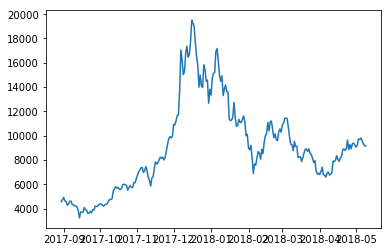

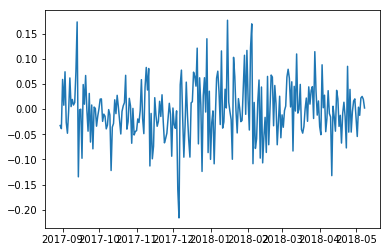

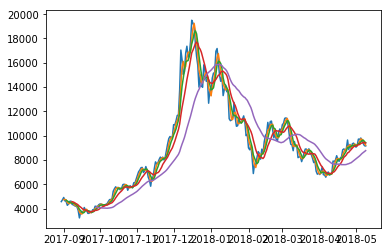

In [3]:
model_config = {}
comp_btc = comp_spot.AssetModelComponentSpot('btc', df_btc, model_config)
comp_eth = comp_spot.AssetModelComponentSpot('eth', df_eth, model_config)
comp_btc.plot_price_close()
comp_btc.plot_log_returns('1d')
comp_btc.plot_close_moving_average([1,3,5,10,30])

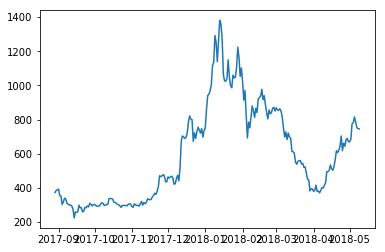

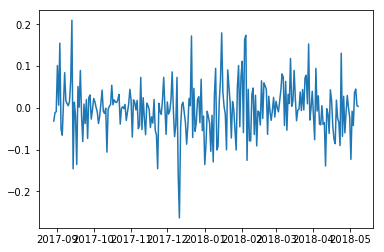

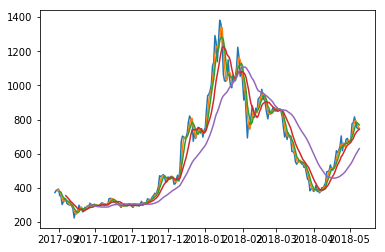

In [4]:
comp_eth.plot_price_close()
comp_eth.plot_log_returns('1d')
comp_eth.plot_close_moving_average([1,3,5,10,30])

In [5]:
model_btc_eth = md.AssetModel([])
model_btc_eth.insert_component(comp_btc)
model_btc_eth.insert_component(comp_eth)

file_btc_eth = open('../data/pickle/model_btc_eth.pickle', 'wb')
pickle.dump(model_btc_eth, file_btc_eth)

In [6]:
# TODO: Data issue. BTC and ETH time_close hours/mins do not line up.
price_btc_eth = model_btc_eth.concat_prices('btc','eth')
price_btc_eth.head()

,btc,eth
2017-08-30,4583.85,384.00
2017-08-31,4736.28,388.48
2017-09-01,4924.00,392.13
2017-09-02,4642.85,354.39
2017-09-03,4607.47,352.18


In [7]:
logret_btc_eth = model_btc_eth.concat_log_return('btc','eth', '1d')
logret_btc_eth.head()

,btc,eth
2017-08-30,-0.032713,-0.011599
2017-08-31,-0.038869,-0.009352
2017-09-01,0.058793,0.101195
2017-09-02,0.007650,0.006256
2017-09-03,0.073992,0.154610


In [8]:
print(model_btc_eth.corr_log_return('btc','eth','1d'))

{-5: 0.13102489133106759, -4: -0.060473105434534144, -3: -0.0068004166735639556, -2: 0.059305293998834219, -1: -0.016964720758239519, 0: 0.64021406645648393, 1: -0.10789022493641043, 2: 0.028728997430170398, 3: 0.077877988369291426, 4: -0.091907705496100278}
